In [36]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def main():
    a, x, y = box_muller(1000)
    theo_pdf = theoretical(np.arange(min(a)-1, max(a)+2, 0.05))
    draw_pdf(a, theo_pdf)

    print('x y covariance:', np.cov(np.vstack((x,y))))
    print('sample mean:', np.mean(a))
    print('sample variance:', np.var(a, ddof=1))
    
    a1,x1,y1 = polar_marsaglia(1000000)
    print('x y covariance:', np.cov(np.vstack((x1,y1))))
    print('sample mean:', np.mean(a1))
    print('sample variance:', np.var(a1, ddof=1))
    
    box_muller_time(1000000)
    polar_marsaglia_time(1000000)

In [38]:
def draw_pdf(a, theo):
    plt.figure()
    plt.hist(a, bins = math.ceil(max(a) - min(a)), edgecolor='black', label='Box Muller', density = 1)
    plt.plot(np.arange(min(a) - 1, max(a) + 2, 0.05), theo, color='r', label='theoretical')
    plt.xticks(range(int(min(a)) - 1, int(max(a)) + 2))
    plt.xlabel('Random variable A = X + Y')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [39]:
def box_muller(n):
    a = []
    x = []
    y = []
    for i in range(n):
        u1, u2 = np.random.uniform(size=2)
        X = ((-2 * math.log(u1)) ** 0.5) * math.cos(2 * math.pi * u2)
        x.append(2 * X + 1)
        Y = ((-2 * math.log(u1)) ** 0.5) * math.sin(2 * math.pi * u2)
        y.append(3 * Y + 2)
        a.append(2 * X + 1 + 3 * Y + 2)
    return a, x, y

In [40]:
def polar_marsaglia(n):
    a = []
    x = []
    y = []
    count = 0
    while count < n:
        X, Y = np.random.uniform(-1, 1, size=2)
        s = X ** 2 + Y ** 2
        if s < 1:
            r1 = X * ((-2 * np.log(s) / s) ** 0.5)
            x.append(2 * r1 + 1)
            r2 = Y * ((-2 * np.log(s) / s) ** 0.5)
            y.append(3 * r2 + 2)
            a.append(2 * r1 + 1 + 3 * r2 + 2)
            count += 1
    return a, x, y

In [41]:
def theoretical(xrange):
    theo = []
    for x in xrange:
        theo.append(np.exp(-((x - 3) ** 2) / (2 * 13)) / ((13 ** 0.5) * np.sqrt(2 * np.pi)))
    return theo

In [42]:
def box_muller_time(n):
    start_time = time.time()
    box_muller(n)
    end_time = time.time()
    print('Box-Muller time:', end_time - start_time)

In [43]:
def polar_marsaglia_time(n):
    start_time = time.time()
    polar_marsaglia(n)
    end_time = time.time()
    print('Polar Marsaglia time:', end_time - start_time)

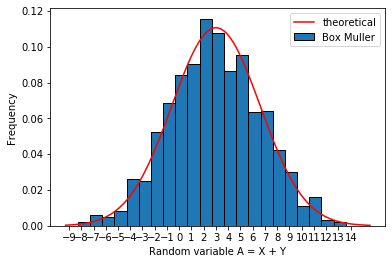

x y covariance: [[ 4.02883272 -0.04545007]
 [-0.04545007  9.45788365]]
sample mean: 2.938091731393635
sample variance: 13.395816230737609
x y covariance: [[ 3.99423827e+00 -1.69319710e-03]
 [-1.69319710e-03  9.00720981e+00]]
sample mean: 2.999613984970189
sample variance: 12.998061688620847
Box-Muller time: 6.7029242515563965
Polar Marsaglia time: 15.930892944335938


In [44]:
if __name__ == '__main__':
    main()